<a href="https://colab.research.google.com/github/Lashadya103/A-single-neuron-based-machine-learning-system/blob/main/OCR_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: I need to incorporate Kaggle Dataset Sri Lanka vehicle number plates to this environment.  Provide the code

!pip install kaggle

# Upload your kaggle.json file
from google.colab import files
files.upload()

# Create a Kaggle directory and move the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Sri Lanka vehicle number plates dataset
!kaggle datasets download -d prabath/sri-lanka-vehicle-number-plates

# Unzip the downloaded dataset
!unzip sri-lanka-vehicle-number-plates.zip


Saving kaggle.json to kaggle.json
403 - Forbidden - Permission 'datasets.get' was denied
unzip:  cannot find or open sri-lanka-vehicle-number-plates.zip, sri-lanka-vehicle-number-plates.zip.zip or sri-lanka-vehicle-number-plates.zip.ZIP.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohankumara/sri-lanka-vehicle-number-plates")

print("Path to dataset files:", path)

100%|██████████| 20.0M/20.0M [00:00<00:00, 61.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rohankumara/sri-lanka-vehicle-number-plates/versions/1


In [1]:
# prompt: Refer to the above path of the dataset and  move it inside the Content folder.

from google.colab import files
import kagglehub
import shutil
import os

# Download latest version
path = kagglehub.dataset_download("rohankumara/sri-lanka-vehicle-number-plates")

print("Path to dataset files:", path)

# Move the dataset folder to /content
if os.path.exists(path):
    destination_folder = '/content'
    shutil.move(path, destination_folder)
    print(f"Dataset moved to: {destination_folder}")
else:
  print("Dataset not found!")

100%|██████████| 20.0M/20.0M [00:00<00:00, 73.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rohankumara/sri-lanka-vehicle-number-plates/versions/1
Dataset moved to: /content


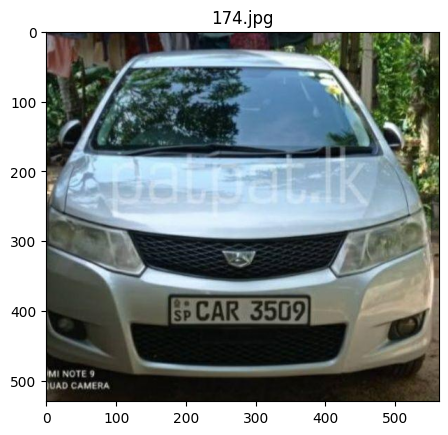

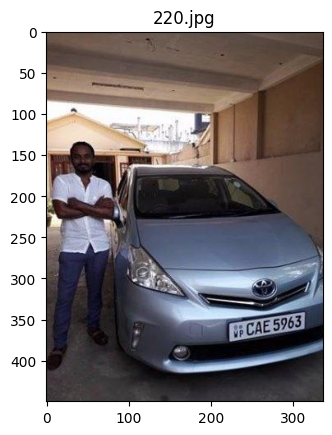

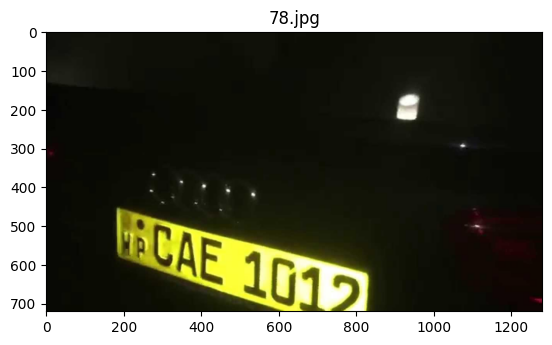

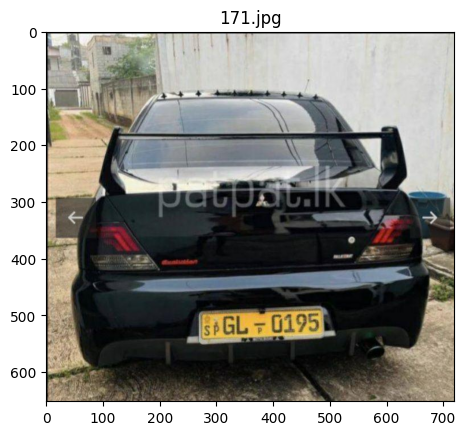

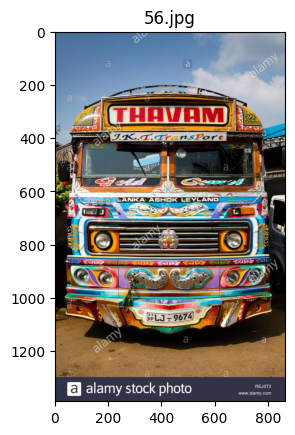

In [ ]:
# prompt: Display randomly selected items from the dataset in the contents folder.

import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Assuming the dataset is in the 'sri-lanka-vehicle-number-plates' folder
dataset_folder = '/content/1/Numberplate'

# Get a list of image files from the folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Select a random sample of images (e.g., 5 images)
num_images_to_display = 5
selected_images = random.sample(image_files, min(num_images_to_display, len(image_files)))

# Display the randomly selected images
for image_file in selected_images:
  image_path = os.path.join(dataset_folder, image_file)
  try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(image_file)
    plt.show()
  except Exception as e:
    print(f"Error loading image {image_file}: {e}")

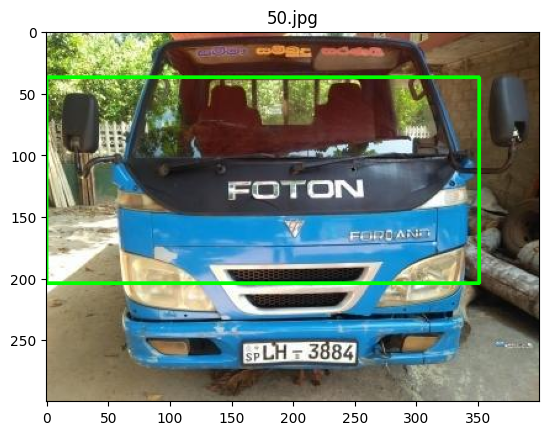

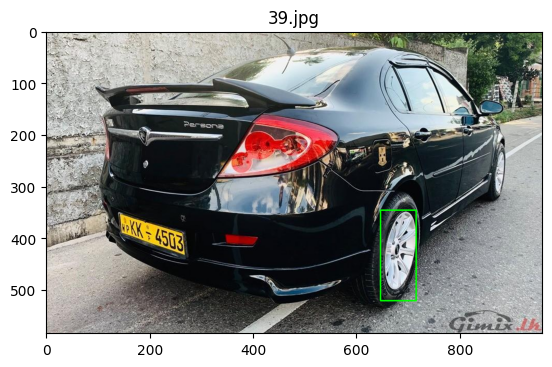

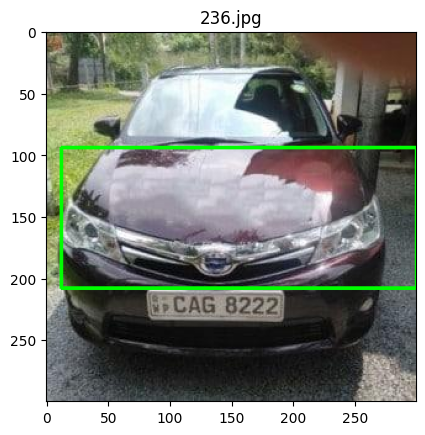

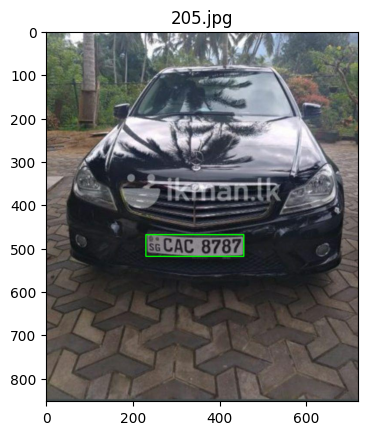

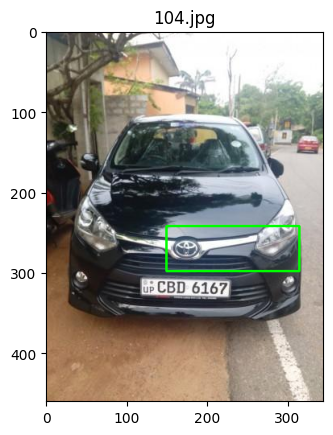

In [ ]:
# prompt: Create region of interest as the number plate.

from google.colab import files
import kagglehub
import shutil
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Assuming the dataset is in the 'sri-lanka-vehicle-number-plates' folder
dataset_folder = '/content/1/Numberplate'

# Get a list of image files from the folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Select a random sample of images (e.g., 5 images)
num_images_to_display = 5
selected_images = random.sample(image_files, min(num_images_to_display, len(image_files)))

# Display the randomly selected images and identify the region of interest (number plate)
for image_file in selected_images:
  image_path = os.path.join(dataset_folder, image_file)
  try:
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply some image processing techniques to identify the number plate (e.g., edge detection, contour finding)
    # This is a simplified example, and you might need more advanced techniques
    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area (likely the number plate)
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw a rectangle around the identified number plate
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with the identified region of interest
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(image_file)
    plt.show()
  except Exception as e:
    print(f"Error loading image {image_file}: {e}")


In [ ]:
# prompt: Generate ideal ResNet-50 architecture for number plate region detection.

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model (without the top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model (optional, but often helps with fine-tuning)
for layer in base_model.layers:
  layer.trainable = False

# Add your own classification layers on top of the ResNet50 base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
# Output layer for bounding box regression (4 values: x, y, width, height)
output_layer = Dense(4, activation='linear')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# You can further customize this architecture based on your specific needs:
# - Change the input size if necessary
# - Add more dense layers or other layers for feature extraction
# - Adjust the number of output units based on your specific bounding box format


# Print the model summary
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 49,279,108 (187.98 MB)

 Trainable params: 25,691,396 (98.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# prompt: Construct training and testing data for the ResNet 50 training from the number plate dataset. Reserve 20% for testing and remaining for training. Create the script for training with 5 epochs.

# Assuming the dataset is in the 'sri-lanka-vehicle-number-plates' folder
dataset_folder = '/content/1/Numberplate'

# Get a list of image files from the folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the image files randomly
random.shuffle(image_files)

# Calculate the split point for training and testing data
split_point = int(len(image_files) * 0.8)  # 80% for training, 20% for testing

# Split the data into training and testing sets
train_files = image_files[:split_point]
test_files = image_files[split_point:]

# train_files and test_files for your training and testing.
# Example:
print(f"Number of training images: {len(train_files)}")
print(f"Number of testing images: {len(test_files)}")

Number of training images: 200
Number of testing images: 51


In [ ]:
# prompt: Apply data augmentation pipeline for both the training and testing data sets.
import os
# Assuming the dataset is in the 'sri-lanka-vehicle-number-plates' folder
dataset_folder = '/content/1/Numberplate'

# Get a list of image files from the folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the image files randomly
random.shuffle(image_files)

# Calculate the split point for training and testing data
split_point = int(len(image_files) * 0.8)  # 80% for training, 20% for testing

# Split the data into training and testing sets
train_files = image_files[:split_point]
test_files = image_files[split_point:]

# Data augmentation pipeline
def augment_image(image_path):
  """Applies data augmentation to an image."""
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [224, 224])  # Resize for ResNet50 input

  # Apply random transformations
  image = tf.image.random_brightness(image, max_delta=0.2)
  image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
  image = tf.image.random_hue(image, max_delta=0.05)

  # Apply random rotation
  image = tf.image.rot90(image) if random.random() > 0.5 else image  # Rotate by 90 degrees randomly


  # Apply random zoom (scale the image)
  zoom_factor = random.uniform(0.8, 1.2)
  height, width = image.shape[0], image.shape[1]
  new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
  image = tf.image.resize(image, [new_height, new_width])  # Resize to zoomed size
  image = tf.image.resize(image, [height, width])  # Resize back to original size

  # Apply random translation (shift the image)
  image = tf.image.random_crop(image, size=[height, width, 3])  # Random crop and padding

  return image

# Apply data augmentation to both training and testing data
train_images = [augment_image(os.path.join(dataset_folder, file)) for file in train_files]
test_images = [augment_image(os.path.join(dataset_folder, file)) for file in test_files]


# Convert the augmented images to numpy arrays
train_images = tf.stack(train_images).numpy()
test_images = tf.stack(test_images).numpy()

# You can now use train_images and test_images for your training and testing.

print(f"Number of training images: {len(train_images)}")
print(f"Number of testing images: {len(test_images)}")

Number of training images: 200
Number of testing images: 51


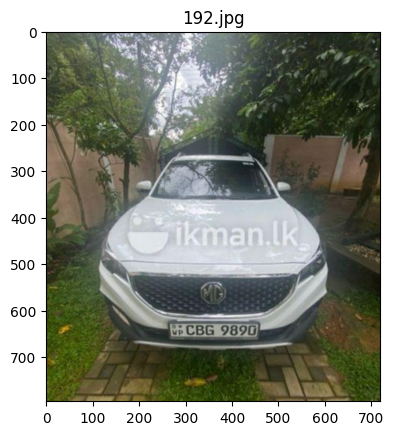

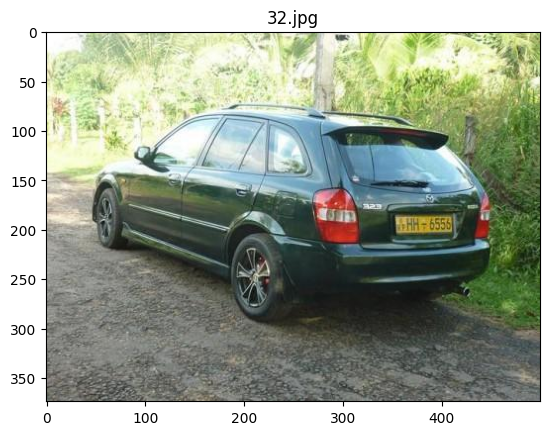

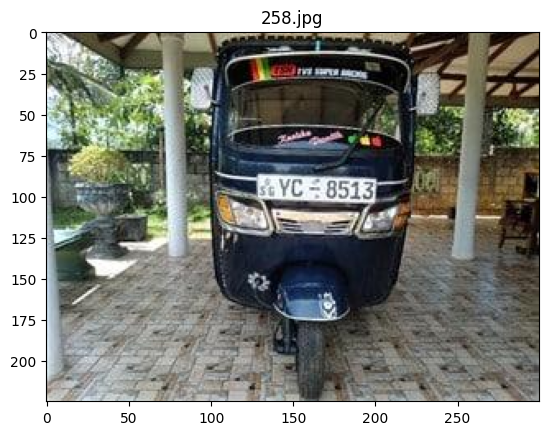

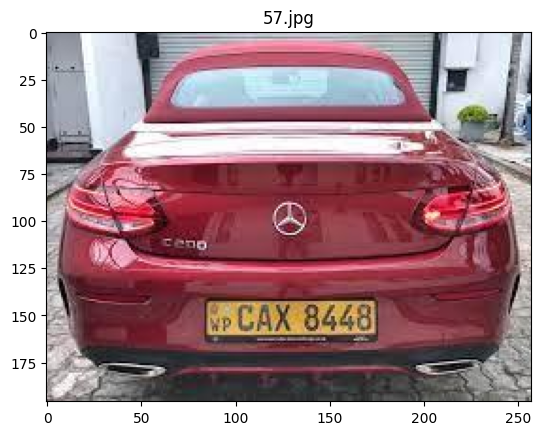

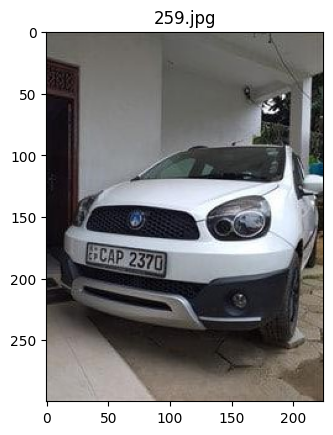

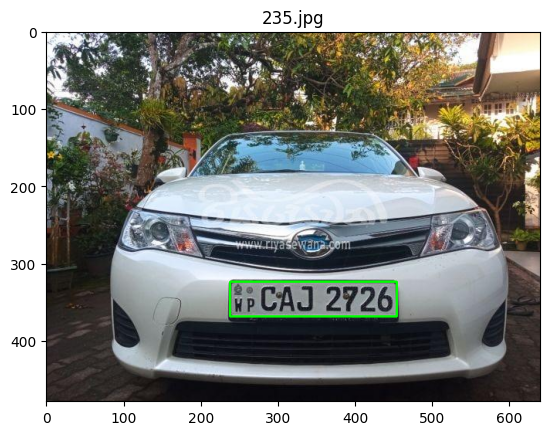

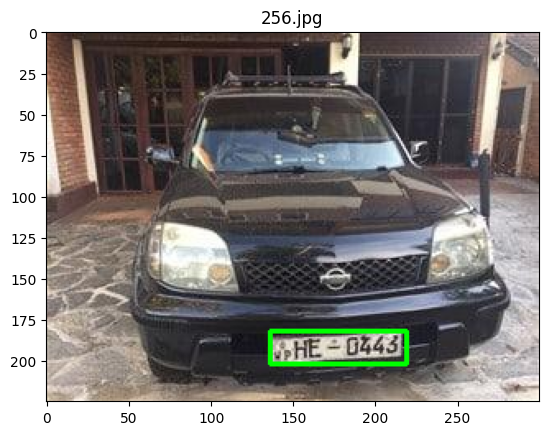

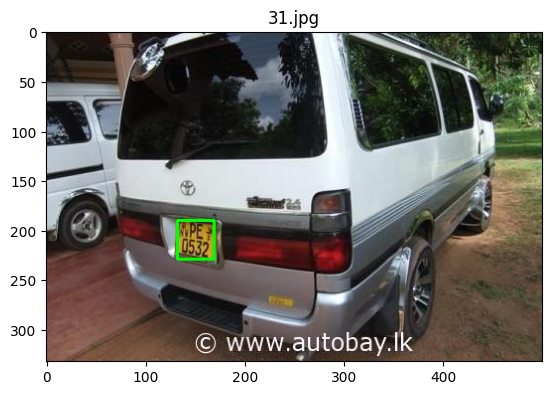

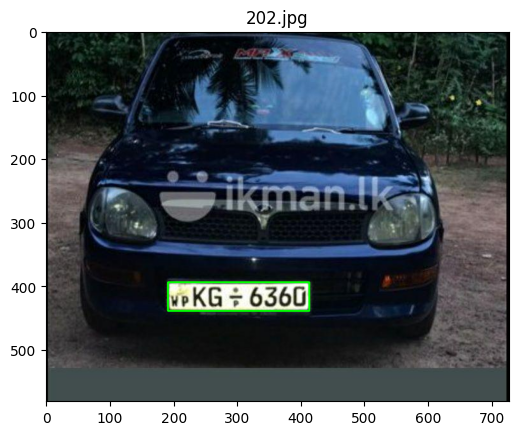

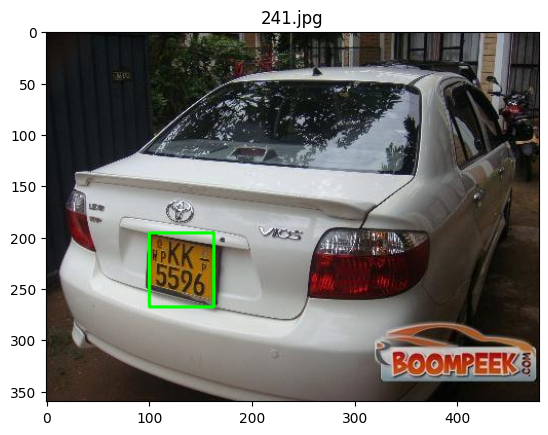

In [ ]:
# prompt: This dataset contains the image and the respective annotation of the bounding box in XML immediately. No seperate folder structure or a CSV file. Modify the belowscript after analysing the folder structure and  to suite with the requirement.
from google.colab import files
import kagglehub
import shutil
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import xml.etree.ElementTree as ET



# Assuming the dataset is in the 'license_plates' folder
dataset_folder = '/content/1/Numberplate'

# Get a list of image files and XML files from the folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
xml_files = [f for f in os.listdir(dataset_folder) if f.endswith('.xml')]


# Select a random sample of images (e.g., 5 images)
num_images_to_display = 5
selected_images = random.sample(image_files, min(num_images_to_display, len(image_files)))

# Display the randomly selected images
for image_file in selected_images:
  image_path = os.path.join(dataset_folder, image_file)
  try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(image_file)
    plt.show()
  except Exception as e:
    print(f"Error loading image {image_file}: {e}")



# Function to extract bounding box information from an XML file
def extract_bounding_box(xml_file_path):
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        object_element = root.find('object')
        if object_element is not None:
            bndbox = object_element.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            return xmin, ymin, xmax, ymax
        else:
            return None
    except Exception as e:
        print(f"Error parsing XML file: {e}")
        return None


# Assuming the dataset is in the 'license_plates' folder
dataset_folder = '/content/1/Numberplate'

# Get a list of image files from the folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Select a random sample of images (e.g., 5 images)
num_images_to_display = 5
selected_images = random.sample(image_files, min(num_images_to_display, len(image_files)))

# Display the randomly selected images and identify the region of interest (number plate)
for image_file in selected_images:
  image_path = os.path.join(dataset_folder, image_file)
  xml_file_path = os.path.splitext(image_path)[0] + '.xml'

  if os.path.exists(xml_file_path):
    bounding_box = extract_bounding_box(xml_file_path)
    if bounding_box:
        try:
            img = cv2.imread(image_path)
            x, y, x2, y2 = bounding_box
            cv2.rectangle(img, (x, y), (x2, y2), (0, 255, 0), 2)

            # Display the image with the identified region of interest
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(image_file)
            plt.show()

        except Exception as e:
            print(f"Error loading image {image_file}: {e}")
    else:
        print(f"No bounding box found for {image_file}")
  else:
    print(f"No corresponding XML file found for {image_file}")





In [ ]:
# prompt: Use above xml boundix box cordinates and numberplate data for training the restnet model. Write the code.

# Assuming the dataset is in the 'license_plates' folder
dataset_folder = '/content/1/Numberplate'

# Get a list of image files and XML files from the folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
xml_files = [f for f in os.listdir(dataset_folder) if f.endswith('.xml')]

# Function to extract bounding box information from an XML file
def extract_bounding_box(xml_file_path):
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        object_element = root.find('object')
        if object_element is not None:
            bndbox = object_element.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            return xmin, ymin, xmax, ymax
        else:
            return None
    except Exception as e:
        print(f"Error parsing XML file: {e}")
        return None

# Prepare training data
train_data = []
for image_file in image_files:
  image_path = os.path.join(dataset_folder, image_file)
  xml_file_path = os.path.splitext(image_path)[0] + '.xml'

  if os.path.exists(xml_file_path):
    bounding_box = extract_bounding_box(xml_file_path)
    if bounding_box:
      try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))  # Resize for ResNet50 input
        x, y, x2, y2 = bounding_box
        # Normalize bounding box coordinates (optional but recommended)
        width = img.shape[1]
        height = img.shape[0]
        normalized_x = x / width
        normalized_y = y / height
        normalized_x2 = x2 / width
        normalized_y2 = y2 / height
        train_data.append((img, [normalized_x, normalized_y, normalized_x2, normalized_y2]))
      except Exception as e:
        print(f"Error processing image {image_file}: {e}")
    else:
      print(f"No bounding box found for {image_file}")
  else:
    print(f"No corresponding XML file found for {image_file}")

# Shuffle the training data
random.shuffle(train_data)

# Split into training and validation sets
split_point = int(len(train_data) * 0.8)
train_set = train_data[:split_point]
val_set = train_data[split_point:]


# Create TensorFlow datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((
    [data[0] for data in train_set],
    [data[1] for data in train_set]
)).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((
    [data[0] for data in val_set],
    [data[1] for data in val_set]
)).batch(32)


# Train the model
model.fit(train_dataset, epochs=100, validation_data=val_dataset) # Adjust epochs as needed


# Save the trained model
model.save('number_plate_detection_model.h5')

No corresponding XML file found for image.jpg
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 62s 7s/step - loss: 6172.4121 - mae: 35.0324 - val_loss: 7.9303 - val_mae: 2.3719
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - loss: 21.6639 - mae: 2.7640 - val_loss: 3.6378 - val_mae: 1.6951
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step - loss: 4.4503 - mae: 1.7248 - val_loss: 3.6372 - val_mae: 1.6948
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - loss: 4.3790 - mae: 1.7056 - val_loss: 3.6355 - val_mae: 1.6941
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - loss: 4.3771 - mae: 1.7049 - val_loss: 3.6331 - val_mae: 1.6933
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - loss: 4.3746 - mae: 1.7041 - val_loss: 3.6302 - val_mae: 1.6923
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - loss: 4.3716 - mae: 1.7030 - val_loss: 3.6269 - val_mae: 1.6912
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 78s 7s/step - loss: 4.3682 - mae: 1.7019 - val_loss: 3.6233 - val_mae: 1.6900
Epoch 9/100
7/7 ━━━━━━━━━━━━━

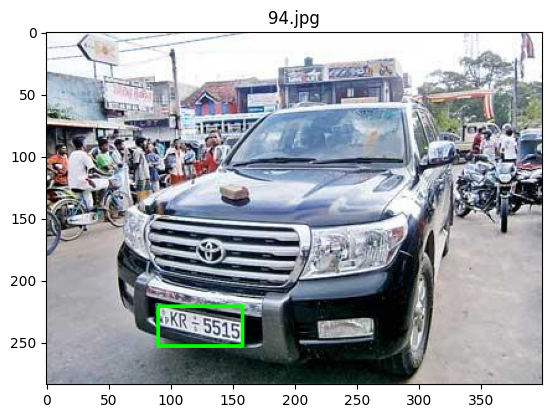

In [ ]:
# prompt: Access a random vehicle image from the test dataset and display it with the bounding box drawing

# Assuming the dataset is in the 'license_plates' folder
dataset_folder = '/content/1/Numberplate'

# Get a list of image files and XML files from the folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
xml_files = [f for f in os.listdir(dataset_folder) if f.endswith('.xml')]

# Function to extract bounding box information from an XML file
def extract_bounding_box(xml_file_path):
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        object_element = root.find('object')
        if object_element is not None:
            bndbox = object_element.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            return xmin, ymin, xmax, ymax
        else:
            return None
    except Exception as e:
        print(f"Error parsing XML file: {e}")
        return None

# Select a random image from the test set
random_image_file = random.choice(test_files)
image_path = os.path.join(dataset_folder, random_image_file)
xml_file_path = os.path.splitext(image_path)[0] + '.xml'

if os.path.exists(xml_file_path):
    bounding_box = extract_bounding_box(xml_file_path)
    if bounding_box:
        try:
            img = cv2.imread(image_path)
            x, y, x2, y2 = bounding_box
            cv2.rectangle(img, (x, y), (x2, y2), (0, 255, 0), 2)

            # Display the image with the identified region of interest
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(random_image_file)
            plt.show()

        except Exception as e:
            print(f"Error loading image {random_image_file}: {e}")
    else:
        print(f"No bounding box found for {random_image_file}")
else:
    print(f"No corresponding XML file found for {random_image_file}")

In [ ]:
# Load the trained model
loaded_model = tf.keras.models.load_model('number_plate_detection_model.h5', custom_objects={'mse': 'mean_squared_error'})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


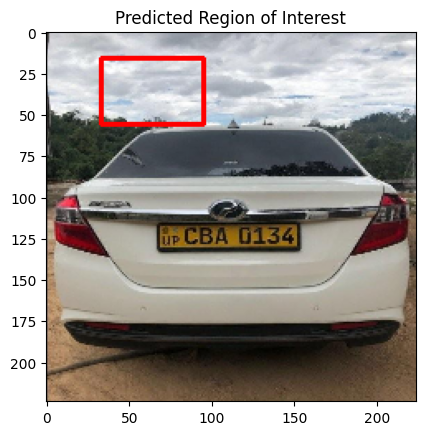

In [ ]:
# prompt: Use the above loaded model to generate a region proposal for a new image from test datase.

# Load a new image from the test set
random_image_file = random.choice(test_files)
image_path = os.path.join(dataset_folder, random_image_file)

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img / 255.0  # Normalize pixel values

# Make a prediction using the loaded model
predicted_bbox = loaded_model.predict(tf.expand_dims(img, axis=0))[0]

# Denormalize the predicted bounding box coordinates
width = img.shape[1]
height = img.shape[0]
predicted_x = int(predicted_bbox[0] * width)
predicted_y = int(predicted_bbox[1] * height)
predicted_x2 = int(predicted_bbox[2] * width)
predicted_y2 = int(predicted_bbox[3] * height)


# Draw the predicted bounding box on the image
cv2.rectangle(img, (predicted_x, predicted_y), (predicted_x2, predicted_y2), (255, 0, 0), 2)

# Display the image with the predicted region of interest
plt.imshow(img)
plt.title("Predicted Region of Interest")
plt.show()